## Homework Assignment 3
### Name: Prasad Akmar
### LE10772

In [101]:
import pandas as pd
import os
import numpy as np
import time

## Loading the data:
#### First of all, Loading the given mnist data and labels into local data structures.
I am using arrays to store the data and the labels

In [102]:
mnist_data = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_data.txt", dtype = np.int)

In [103]:
mnist_labels = np.loadtxt(fname = "https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_labels.txt",dtype = np.int)

In [104]:
mnist_data.shape

(10000, 784)

In [105]:
mnist_labels.shape

(10000,)

## Converting labels:
#### The problem given is a binary problem. We just have to find out if the given number is 8 or not.
So converting the label data into 0s and 1s. i.e. if given number is 8, the label is 1 otherwise 0. This converted data now can be used in the binary classification problem

In [106]:
for n, i in enumerate(mnist_labels):
    if i == 8:
        mnist_labels[n] = 1
    else:
        mnist_labels[n] = 0

In [107]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [183]:
def logistic_reg(mnist_data,mnist_labels,num_steps,learning_rate):
    start = time.time()
    weights = np.zeros(mnist_data.shape[1])
    for step in range(num_steps):
        gradient = np.zeros(mnist_data.shape[1])
        for i in (1,10000):
            scores = np.dot(mnist_data,weights)
            predictions = sigmoid(scores)
            error = mnist_labels - predictions
            for j in (1,784):
                gradient += np.dot(mnist_data.T, error)
        weights += learning_rate * gradient
    end = time.time()
    print('Time taken : {0} seconds'. format((end-start)))
    return weights

In [184]:
weights = logistic_reg(mnist_data,mnist_labels,600,1e-3)

Time taken : 102.97058248519897 seconds


In [191]:
final_scores = np.dot(mnist_data, weights)
predictions = np.round(sigmoid(final_scores))
print ('Accuracy : {0}'.format((predictions == mnist_labels).sum().astype(float) / len(preds)))

Accuracy : 0.9201


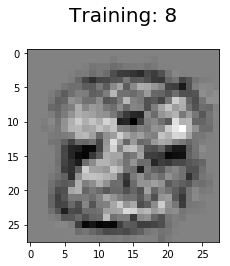

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(weights, [8])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(weights,(28,28)),cmap = plt.cm.gist_gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [90]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(mnist_data,mnist_labels,num_steps,learning_rate,lmbda):
    start = time.time()
    weights = np.zeros(mnist_data.shape[1])
    for step in range(num_steps):
        gradient = np.zeros(mnist_data.shape[1])
        for i in (1,10000):
            scores = np.dot(mnist_data,weights)
            predictions = sigmoid(scores)
            error = mnist_labels - predictions
            for j in (1,784):
                gradient += np.dot(mnist_data.T, error)
        weights += learning_rate * gradient
    end = time.time()
    print('Time taken : {0}'. format((end-start)))
    return weights